In [1]:
# Getting all the imports in place first 

%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
 
# Data Preperation    
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Models we could need 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb 

# Evaluation metrics we would need for our model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import roc_auc_score,RocCurveDisplay, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
data = pd.read_csv('data/heart.csv')

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
data.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [6]:
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
data.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
data.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [9]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [10]:
pd.crosstab(data.Sex, data.HeartDisease)

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


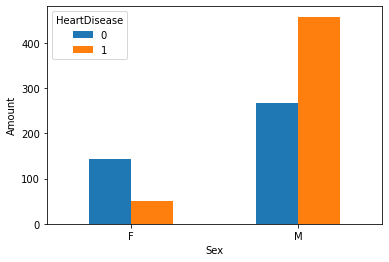

In [11]:
pd.crosstab(data.Sex, data.HeartDisease).plot(kind='bar')
plt.ylabel('Amount')
plt.xticks(rotation=0);

# we can notice one thing is that the ration for males is more than that of the females
# so we can pretty much tell that the gender would play a vital part.

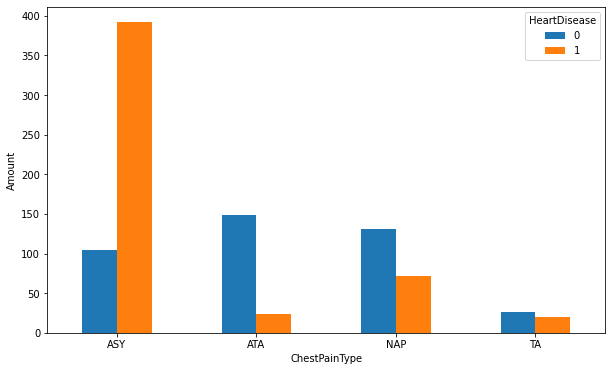

In [12]:
# we can also make this observation with type of chest pain
pd.crosstab(data.ChestPainType, data.HeartDisease).plot(kind='bar',
                                                       figsize=(10,6))
plt.ylabel('Amount')
plt.xticks(rotation=0);

# here as well we can see that the ASY type of chest pain has had more heartDisease patients 

In [13]:
# Splitting the data in training and test split 

np.random.seed(16)

X = data.drop('HeartDisease', axis =1)
y = data["HeartDisease"]

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.25)

X_train.head()

# we have 5 columns with string data's so we will have to convert them to numeric data's

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
484,65,M,ASY,134,0,0,Normal,112,Y,1.1,Flat
315,74,M,ATA,145,0,1,ST,123,N,1.3,Up
672,60,F,NAP,120,178,1,Normal,96,N,0.0,Up
806,70,M,ASY,145,174,0,Normal,125,Y,2.6,Down
544,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up


In [14]:
# Assuming 'data' is your original dataframe with both categorical and numeric columns
#categorical_features = ["ST_Slope", "ExerciseAngina", "RestingECG", "ChestPainType", "Sex"]
#numeric_features = [col for col in data.columns if col not in categorical_features]

# One-hot encode categorical features
#one_hot = OneHotEncoder()
#X1_train_categorical = one_hot.fit_transform(data[categorical_features]).toarray()
#X1_train_categorical = pd.DataFrame(X1_train_categorical, columns=one_hot.get_feature_names_out(categorical_features))

# Concatenate one-hot encoded and numeric columns
#X1_train = pd.concat([X1_train_categorical, data[numeric_features]], axis=1)

C:\Users\janha\AppData\Local\Temp\ipykernel_10460\3559514462.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = data.corr()


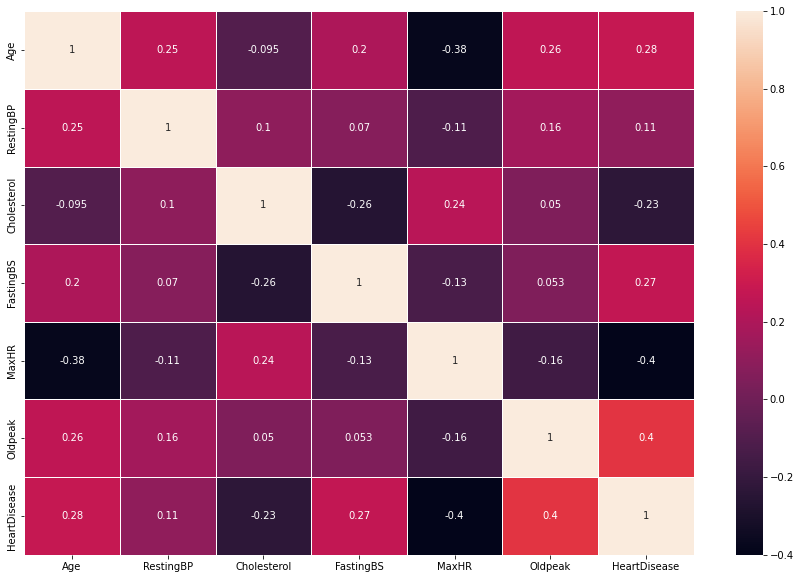

In [15]:
cor_mat = data.corr()
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(cor_mat,
                annot=True,
                linewidth=0.5)

# only the coulmns with numerical values will be present here

In [16]:
# Assuming X_train and X_test are your original DataFrames

categorical_features = ["ST_Slope", "ExerciseAngina", "RestingECG", "ChestPainType", "Sex"]
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Create a ColumnTransformer
one_hot = OneHotEncoder(sparse_output=False)  # Set sparse_output to False to ensure dense array output
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')

# Fit and transform the training set
XT_train = transformer.fit_transform(X_train)

# Manually create column names
one_hot_columns = list(transformer.named_transformers_['one_hot'].get_feature_names_out(categorical_features))
feature_names = one_hot_columns + numeric_features

# Create a DataFrame with the transformed data and assigned column names for the training set
X_train_transformed = pd.DataFrame(XT_train, columns=feature_names)

# Transform the testing set using the already fitted transformer
XT_test = transformer.transform(X_test)

# Create a DataFrame with the transformed data and assigned column names for the testing set
X_test_transformed = pd.DataFrame(XT_test, columns=feature_names)

# Now X_train_transformed and X_test_transformed have column names
#X_train_transformed

#X_test_transformed

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "SVM" : LinearSVC(),
}

In [18]:
def fit_evaluate (model, X_train,X_test, y_train, y_test):
    model_score = {}
    
    for name,model in model.items():
        # fit the model
        model.fit(X_train, y_train)
        # Evaluate the model
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [19]:
scores = fit_evaluate(models,X_train_transformed,X_test_transformed,y_train,y_test)
scores

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.8565217391304348,
 'KNN': 0.717391304347826,
 'Random Forest': 0.8652173913043478,
 'SVM': 0.7347826086956522}

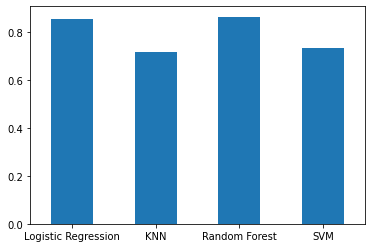

In [20]:
pd.DataFrame(scores, index=[0]).T.plot(kind='bar',
                                      legend=False);

plt.xticks(rotation=0);

In [21]:
# we can see that the KNN model is the worst performing so we will just try and tune it by hand

knn = KNeighborsClassifier(n_neighbors=20,
                           weights='uniform',
                           algorithm='auto',
                           leaf_size=30)

knn.fit(X_train_transformed, y_train)
knn.score(X_test_transformed, y_test)

0.7086956521739131

In [22]:
# we can also run a randomized seach cv on knn and see if it improves or we can then discard it 
knn = KNeighborsClassifier()

knn_param = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_rs = RandomizedSearchCV(knn,
                            param_distributions=knn_param,
                            cv=5,
                            verbose=True,
                            n_iter=30)

knn_rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   verbose=True)

In [23]:
knn_rs.best_params_

{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}

In [24]:
knn_rs.score(X_test_transformed,y_test)
# as we can see that we have only improved the accuracy by 4% so we can pretty much discard it 

0.7478260869565218

In [25]:
# Now we can try and improve other models, 
np.random.seed(16)

log_param = {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

lgreg = LogisticRegression()

lg_rs = RandomizedSearchCV(lgreg,
                          param_distributions=log_param,
                          cv=5,
                          n_iter=25,
                          verbose=True)

lg_rs.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=True)

In [26]:
lg_rs.best_params_

{'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 100,
 'C': 4.281332398719396}

In [27]:
lg_rs.score(X_test_transformed, y_test)   

0.8565217391304348

In [28]:
np.random.seed(16)

rf_param = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


rfc = RandomForestClassifier()

rfc_rs = RandomizedSearchCV(rfc,
                           param_distributions=rf_param,
                           cv=5,
                           n_iter=25,
                           verbose=True)

rfc_rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=True)

In [29]:
rfc_rs.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [30]:
rfc_rs.score(X_test_transformed, y_test)

0.8652173913043478

In [31]:
np.random.seed(16)

ls_param = {'C': [0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2'],
            'dual': [False, True],
            'tol': [1e-3, 1e-4, 1e-5],
            'fit_intercept': [True, False]}

ls = LinearSVC()

ls_rs = RandomizedSearchCV(ls,
                            param_distributions=ls_param,
                            cv=5,
                            n_iter=25,
                            verbose=25)

ls_rs.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001
[CV 1/5; 1/25] END C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.855 total time=   0.0s
[CV 2/5; 1/25] START C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001
[CV 2/5; 1/25] END C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.804 total time=   0.0s
[CV 3/5; 1/25] START C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001
[CV 3/5; 1/25] END C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.819 total time=   0.0s
[CV 4/5; 1/25] START C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001
[CV 4/5; 1/25] END C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.854 total time=   0.0s
[CV 5/5; 1/25] START C=100, dual=True, fit_intercept=False, penalty=l2, tol=0.0001
[CV 5/5; 1/25] END C=100, dual=True, fit_intercept=False, penalty=l

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python3

[CV 4/5; 4/25] END C=0.1, dual=False, fit_intercept=False, penalty=l1, tol=0.0001;, score=0.891 total time=   0.0s
[CV 5/5; 4/25] START C=0.1, dual=False, fit_intercept=False, penalty=l1, tol=0.0001
[CV 5/5; 4/25] END C=0.1, dual=False, fit_intercept=False, penalty=l1, tol=0.0001;, score=0.898 total time=   0.0s
[CV 1/5; 5/25] START C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001
[CV 1/5; 5/25] END C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001;, score=0.790 total time=   0.0s
[CV 2/5; 5/25] START C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001
[CV 2/5; 5/25] END C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001;, score=0.804 total time=   0.0s
[CV 3/5; 5/25] START C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001
[CV 3/5; 5/25] END C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001;, score=0.558 total time=   0.0s
[CV 4/5; 5/25] START C=1000, dual=True, fit_intercept=False, penalty=l2, tol=0.001
[CV 4/5; 5/2

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5; 8/25] END C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05;, score=0.848 total time=   0.0s
[CV 2/5; 8/25] START C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05.
[CV 2/5; 8/25] END C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05;, score=0.855 total time=   0.0s
[CV 3/5; 8/25] START C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05.
[CV 3/5; 8/25] END C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05;, score=0.833 total time=   0.0s
[CV 4/5; 8/25] START C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05.
[CV 4/5; 8/25] END C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05;, score=0.898 total time=   0.0s
[CV 5/5; 8/25] START C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05.
[CV 5/5; 8/25] END C=1, dual=False, fit_intercept=True, penalty=l1, tol=1e-05;, score=0.891 total time=   0.0s
[CV 1/5; 9/25] START C=10, dual=False, fit_intercept=True, penalty=l2, tol=1e-05
[CV 1/5; 9/25] END C=10, dual=False, fit

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5; 12/25] END C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.848 total time=   0.0s
[CV 3/5; 12/25] START C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001
[CV 3/5; 12/25] END C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.833 total time=   0.0s
[CV 4/5; 12/25] START C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001
[CV 4/5; 12/25] END C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.891 total time=   0.0s
[CV 5/5; 12/25] START C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001
[CV 5/5; 12/25] END C=1000, dual=False, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.891 total time=   0.0s
[CV 1/5; 13/25] START C=1000, dual=False, fit_intercept=True, penalty=l2, tol=1e-05
[CV 1/5; 13/25] END C=1000, dual=False, fit_intercept=True, penalty=l2, tol=1e-05;, score=0.848 total time=   0.0s
[CV 2/5; 13/25] START C=1000, dual=False, fit_intercept=True, penalty=l2, t

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python3

[CV 2/5; 23/25] END C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001;, score=0.870 total time=   0.0s
[CV 3/5; 23/25] START C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001
[CV 3/5; 23/25] END C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001;, score=0.819 total time=   0.0s
[CV 4/5; 23/25] START C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001
[CV 4/5; 23/25] END C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001;, score=0.891 total time=   0.0s
[CV 5/5; 23/25] START C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001
[CV 5/5; 23/25] END C=100, dual=True, fit_intercept=True, penalty=l2, tol=0.0001;, score=0.818 total time=   0.0s
[CV 1/5; 24/25] START C=0.1, dual=False, fit_intercept=False, penalty=l2, tol=0.0001
[CV 1/5; 24/25] END C=0.1, dual=False, fit_intercept=False, penalty=l2, tol=0.0001;, score=0.848 total time=   0.0s
[CV 2/5; 24/25] START C=0.1, dual=False, fit_intercept=False, penalty=l2, tol=0.0001
[CV 2/5; 

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py", line 1

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=25,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'penalty': ['l1', 'l2'],
                                        'tol': [0.001, 0.0001, 1e-05]},
                   verbose=25)

In [32]:
ls_rs.best_params_

{'tol': 0.0001,
 'penalty': 'l1',
 'fit_intercept': False,
 'dual': False,
 'C': 0.1}

In [33]:
ls_rs.score(X_test_transformed, y_test)

0.8565217391304348

In [34]:
scores

{'Logistic Regression': 0.8565217391304348,
 'KNN': 0.717391304347826,
 'Random Forest': 0.8652173913043478,
 'SVM': 0.7347826086956522}

In [35]:
n_scores = {
    'Logistic Regression': lg_rs.score(X_test_transformed, y_test),
    'Random Forest' : rfc_rs.score(X_test_transformed, y_test),
    "SVM" : ls_rs.score(X_test_transformed, y_test)
}

n_scores

{'Logistic Regression': 0.8565217391304348,
 'Random Forest': 0.8652173913043478,
 'SVM': 0.8565217391304348}

# Hyperparameter Tuning with GridSearchCV

In [36]:
# Logistic regression

np.random.seed(16)

log_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','sag','saga'],
    'max_iter' : [1000,2500, 5000]
    }

log = LogisticRegression()

log_gr = GridSearchCV(log,
                     param_grid=log_grid,
                     cv=5,
                     verbose=True)

log_gr.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1200 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\janha\AppData\Roaming\Python\Python310\site-p

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'sag', 'saga']},
             verbose=True)

In [37]:
log_gr.best_params_

{'C': 0.23357214690901212,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [38]:
log_gr.score(X_test_transformed, y_test)

0.8652173913043478

In [39]:
# Random Forest Classifier
np.random.seed(16)

rf_grid = {'bootstrap': [True],
 'max_depth': [ 25, 30],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [400, 600]}

rf = RandomForestClassifier()

rf_gr = GridSearchCV(rf,
                    param_grid=rf_grid,
                    cv=5,
                    verbose=True)

rf_gr.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [25, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [400, 600]},
             verbose=True)

In [40]:
rf_gr.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [41]:
rf_gr.score(X_test_transformed,y_test)

0.8739130434782608

In [42]:
# Linear SVC
np.random.seed(16)

ls_grid  = {'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'dual': [False, True],
            'tol': [1e-3, 1e-4],
            'fit_intercept': [True, False]}

ls = LinearSVC()

ls_gr = GridSearchCV(ls,
                    param_grid=ls_grid,
                    cv=5,
                    verbose=True)

ls_gr.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python3

C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\janha\AppData\Roaming\Python\Python3

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10], 'dual': [False, True],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'], 'tol': [0.001, 0.0001]},
             verbose=True)

In [43]:
ls_gr.best_params_

{'C': 0.1, 'dual': False, 'fit_intercept': True, 'penalty': 'l1', 'tol': 0.001}

In [44]:
ls_gr.score(X_test_transformed, y_test)

0.8565217391304348

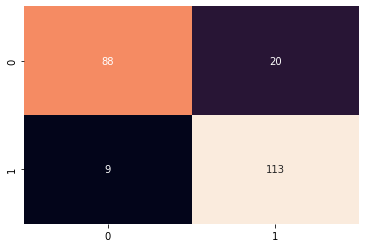

In [45]:
# Evaluating with other metrics as we are getting same results after hypertuning we will use the randomforestclassifier 

y_preds = rf_gr.predict(X_test_transformed)

con_mat = confusion_matrix(y_test, y_preds)


sns.heatmap(con_mat,
           annot=True,
           cbar=False,
           fmt='d');

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       108
           1       0.85      0.93      0.89       122

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



0.9008803885853066


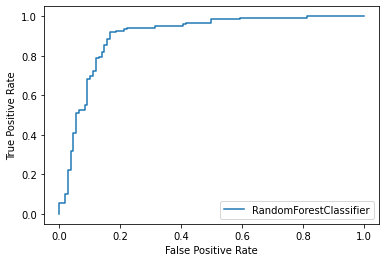

In [47]:
y_proba = rf_gr.predict_proba(X_test_transformed)

y_score = y_proba[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_score)

best_model = rf_gr.best_estimator_

roc_display = RocCurveDisplay(estimator_name=str(best_model.__class__.__name__), fpr=fpr, tpr=tpr)

roc_display.plot();

print(roc_auc_score(y_test,y_score))

In [48]:
categorical_features = ["ST_Slope", "ExerciseAngina", "RestingECG", "ChestPainType", "Sex"]
numeric_features = [col for col in X.columns if col not in categorical_features]

# Create a ColumnTransformer
one_hot = OneHotEncoder(sparse_output=False)
transformer = ColumnTransformer([('onehot', one_hot, categorical_features)], remainder='passthrough')

# Fit and transform the entire dataset
XT = transformer.fit_transform(X)

# Ensure feature names include one-hot encoded and numeric features
one_hot_columns = list(transformer.named_transformers_['onehot'].get_feature_names_out(categorical_features))
feature_names = one_hot_columns + numeric_features

# Create a DataFrame with the transformed data and assigned column names
X = pd.DataFrame(XT, columns=feature_names)

# Assuming you have RandomForestClassifier (rf_gr) defined
cv_rf = cross_val_score(rf_gr, X, y, cv=5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [49]:
cv_rf = np.mean(cv_rf)
cv_rf

0.8299893086243764

In [50]:
cv_recall = cross_val_score(rf_gr,X,y,
                           cv=5,
                           scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.858124635993011

In [51]:
cv_precision = cross_val_score(rf_gr,X,y,
                           cv=5,
                           scoring='precision')

cv_precision = np.mean(cv_precision)
cv_precision

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8395143786414516

In [52]:
cv_f1 = cross_val_score(rf_gr,X,y,
                           cv=5,
                           scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8466503303298202

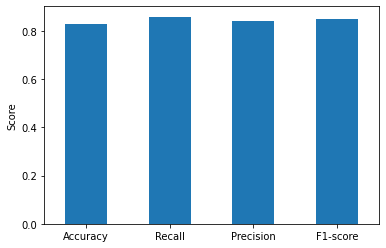

In [53]:
cross_val = {
    'Accuracy': cv_rf,
    'Recall': cv_recall,
    'Precision': cv_precision,
    'F1-score': cv_f1
}

pd.DataFrame(cross_val, index=[0]).T.plot(kind='bar', legend=False)
plt.ylabel("Score")
plt.xticks(rotation=0);

In [54]:
rf_gr.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [55]:
clf = RandomForestClassifier(bootstrap = True,
 max_depth = 40,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 800)

clf.fit(X_train_transformed,y_train)

RandomForestClassifier(max_depth=40, min_samples_split=5, n_estimators=800)

In [56]:
# finding the important features

feature_imp = clf.feature_importances_

In [57]:
feature_imp

array([0.00664728, 0.11694029, 0.15168726, 0.06171522, 0.06661766,
       0.01229564, 0.00846757, 0.00736539, 0.08493503, 0.02681877,
       0.01180562, 0.00725931, 0.02602522, 0.02688349, 0.05641188,
       0.05615003, 0.07803035, 0.02150213, 0.09405885, 0.07838299])

In [58]:
feature_dict = dict(zip(X.columns, list(feature_imp)))
feature_dict

{'ST_Slope_Down': 0.006647281728991411,
 'ST_Slope_Flat': 0.11694028895525006,
 'ST_Slope_Up': 0.1516872594621423,
 'ExerciseAngina_N': 0.061715216107862535,
 'ExerciseAngina_Y': 0.06661766469857229,
 'RestingECG_LVH': 0.012295643880346343,
 'RestingECG_Normal': 0.0084675741332559,
 'RestingECG_ST': 0.007365386156271038,
 'ChestPainType_ASY': 0.0849350252236008,
 'ChestPainType_ATA': 0.026818774222260727,
 'ChestPainType_NAP': 0.011805615256170658,
 'ChestPainType_TA': 0.007259314906081946,
 'Sex_F': 0.02602522453795831,
 'Sex_M': 0.026883493361775486,
 'Age': 0.05641188110253382,
 'RestingBP': 0.05615002742237954,
 'Cholesterol': 0.07803035329830234,
 'FastingBS': 0.021502129167179848,
 'MaxHR': 0.09405885144217163,
 'Oldpeak': 0.07838299493689307}

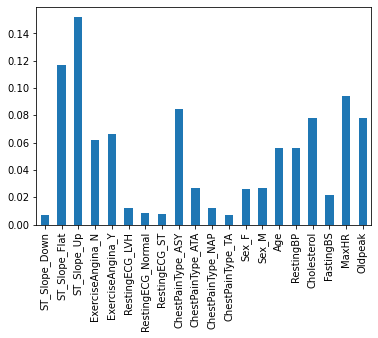

In [59]:
feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(legend=False);

# We can deduce from this which all the features are important and not.

### Trying out the xgb model 

In [62]:
train = xgb.DMatrix(X_train_transformed, label=y_train)
test = xgb.DMatrix(X_test_transformed, label=y_test)

params = {
    'max_depth':3,
    'eta':0.1,
    'objective': 'binary:hinge'
}

epochs =100

XGB_model = xgb.train(params, train, epochs)
XGB_preds = XGB_model.predict(test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, XGB_preds)

0.8478260869565217

In [66]:
scores['XGB'] = accuracy_score(y_test, XGB_preds)
scores

{'Logistic Regression': 0.8565217391304348,
 'KNN': 0.717391304347826,
 'Random Forest': 0.8652173913043478,
 'SVM': 0.7347826086956522,
 'XGB': 0.8478260869565217}

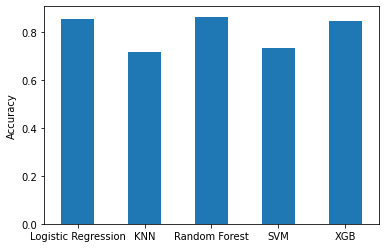

In [70]:
pd.DataFrame(scores, index=[0]).T.plot(kind='bar',legend=False)

plt.ylabel('Accuracy')
plt.xticks(rotation=0);